# Problems
***

This Jupyter Notebook contains the assessment for the module of Applied Statistics taught by Ian McLoughlin. This assessment is composed by 4 problems which aim to demonstrate the skills acquired within this course.

In [29]:
# Install all required libraries

"""Numerical structures and operations.
https://numpy.org/doc/stable/reference/index.html#reference"""
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

"""Plotting.
https://matplotlib.org/stable/contents.html"""
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

# From Python Standard Library:

"""Mathematical functions
https://docs.python.org/3/library/math.html"""
import math

"""Permutations and combinations 
https://docs.python.org/3/library/itertools.html"""
import itertools

"""Random selections
https://docs.python.org/3/library/random.html"""
import random



# import sympy as sp
# from nose import with_setup, tools
# from sklearn import datasets
# from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
# from qiskit.visualization import plot_histogram
# import yfinance as yf

## Problem 1: Extending the Lady Tasting Tea


We're exploring an extension of a famous statistics experiment called the Lady Tasting Tea that was first conducted by Ronald Fisher in 1935 and reported in his book The Design of Experiments.

### The Original Experiment (Brief History)

In the original Lady Tasting Tea experiment, Fisher tested a woman's claim that she could tell whether milk or tea was poured first into a cup. Fisher used a hypothesis testing approach:

- Null hypothesis: Her guesses were random (just luck)
- Alternative hypothesis: She had real ability

She was given 8 cups (4 tea-first and 4 milk-first) in random order. Fisher calculated that the probability of correctly identifying all cups by chance was 1 in 70. This meant that if she got all cups correct, it provided strong evidence against the null hypothesis (that she was just guessing).

This experiment became a foundational example of statistical hypothesis testing and experimental design. [Learn more about the original experiment](https://en.wikipedia.org/wiki/Lady_tasting_tea)

### Our Extended Experiment

While Fisher used 8 cups (4 tea-first and 4 milk-first), we're extending this to 12 cups: 8 tea-first and 4 milk-first. We're testing the same basic claim: a participant says they can tell which was poured first. What we'll do:

- Simulate the experiment using Python and NumPy
- Randomly shuffle the cups many times to see what happens by chance
- Calculate the probability of correctly identifying all cups by random guessing
- Compare how this extended design affects our conclusions

This extension highlights the importance of understanding how changes in experimental design can influence results, how sample size and proportions affect statistical evidence, and how programming can be used to analyze classical experiments. It also encourages reflection on whether different experimental designs require distinct standards for interpretation and evaluation.


### Understanding Our Extended Setup

Let's see what we're working with in our 12-cup version:

In [30]:
print("=== LADY TASTING TEA - EXTENDED VERSION ===")
print()
print("BACKGROUND:")
print("• Original Fisher experiment: 8 cups (4 tea-first, 4 milk-first)")
print("• Probability of perfect guess by chance: 1 in 70")
print("• Our extension: 12 cups (8 tea-first, 4 milk-first)")
print()
print("OUR EXPERIMENT SETUP:")
print("- 12 total cups of tea")
print("- 8 cups: TEA poured first")
print("- 4 cups: MILK poured first")
print()
print("HYPOTHESIS TESTING:")
print("Null hypothesis: The participant is just guessing randomly")
print("Alternative hypothesis: The participant can really tell the difference")
print()
print("We'll simulate random guessing to see how often someone")
print("could get perfect results just by luck!")

=== LADY TASTING TEA - EXTENDED VERSION ===

BACKGROUND:
• Original Fisher experiment: 8 cups (4 tea-first, 4 milk-first)
• Probability of perfect guess by chance: 1 in 70
• Our extension: 12 cups (8 tea-first, 4 milk-first)

OUR EXPERIMENT SETUP:
- 12 total cups of tea
- 8 cups: TEA poured first
- 4 cups: MILK poured first

HYPOTHESIS TESTING:
Null hypothesis: The participant is just guessing randomly
Alternative hypothesis: The participant can really tell the difference

We'll simulate random guessing to see how often someone
could get perfect results just by luck!


### How Many Possible Arrangements?

In order to complete this in python, we first define the variables of each group in order to keep track of the tea preparation options as well as the group containing all cups.

In [31]:
# Number of cups of tea in total
all_cups = 12

# Number of cups of tea with milk added first
milk_first_cups = 4

# Number of cups of tea with tea added first
tea_first_cups = 8

### Using the function math.comb(n, k)

Now we use math.comb(n, k), which is a built-in Python function (introduced in Python 3.8) that comes from the math module. The [Python Standard Library](https://docs.python.org/3/library/math.html#math.comb) documentation regarding `math.comb(n, k)` was consulted to develop the work on this section. 

This function calculates how many ways to choose k elements from a set of n elements. Here, order of the elements does not matter. Each element is only selected once.

Behind the scenes, the function uses this formula:

$$
\frac{n!}{k! \times (n - k)!}
$$

Let's calculate how many different ways the milk-first cups could be arranged in our extended version.

In [32]:
# Number of ways to choose 4 cups from 12
ways = math.comb(all_cups, milk_first_cups)

# Display the number of combinations
ways

# Expected Probability:
expected_prob = 1 / ways

#### Let’s break it down:
- **n! (n factorial)** means multiplying all the numbers from `1` to `n`.  
  For example, n in our case is `all_cups`, so for n! we have (12 x 11 x 10 x ... x 1).   
  To do this in Python we will use math.factorial() function which generates the product of a positive integer and all the integers below it. The use this function, I consulted [math.factorial(n)](https://docs.python.org/3/library/math.html#math.factorial) in Python Standard Library.

In [33]:
# n!
n_fact= math.factorial(all_cups)

# Display n!
n_fact

479001600

- **k!** means multiplying all the numbers from `1` to `k`.
  k in our example is milk_first_cups, so for k! we have (4 x 3 x 2 x 1).
  Here we use math.factorial again which gives us:

In [34]:
# k!
k_fact = math.factorial(milk_first_cups)

# Display k!
k_fact

24

- **(n-k)!** means multiplying all the numbers from `1` to the difference between `n` and `k`:

In [35]:
# (n-k)!
n_k_fact = math.factorial(all_cups - milk_first_cups)

# Display (n-k)!
n_k_fact

40320

- Replacing the values in the formula we have:

  - n! = 479001600 
  - k! = 24 
  - (n-k)! = 40320 

-  So the formula works by dividing `n!` by the product of `k!` and `(n - k)!` to find the total number of unique combinations.

In [36]:
# Total combinations using the formula n! / (k! * (n-k)!)
comb = n_fact // (k_fact * n_k_fact)

# Display total combinations
comb

495

In [37]:
# Confirming both methods give the same result
ways == comb

True

### Simulating Random Guessing with NumPy

Now let's use Python to simulate what happens when people guess randomly many times:

In [38]:
def simulate_extended_experiment(num_trials=50000):
    true_cups = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
    perfect_guesses = 0

    for _ in range(num_trials):
        guessed_cups = true_cups.copy()
        random.shuffle(guessed_cups)
        
        if guessed_cups == true_cups:
            perfect_guesses += 1

    simulated_probability = perfect_guesses / num_trials
    return simulated_probability, perfect_guesses

In [39]:
# Run simulation
print("Running simulation with 50,000 trials...")
simulated_prob, perfect_count = simulate_extended_experiment(50000)

Running simulation with 50,000 trials...


In [40]:
# Display results
print(f"Perfect guesses: {perfect_count} out of 50,000")
print(f"Simulated probability: {simulated_prob:.6f}")
print(f"Expected probability: {expected_prob:.6f}")

Perfect guesses: 103 out of 50,000
Simulated probability: 0.002060
Expected probability: 0.002020


In [49]:
# Calculate accuracy
difference = abs(simulated_prob - expected_prob)
accuracy = (1 - difference / expected_prob) * 100
print(f"Difference: {difference:.6f}")
print(f"Simulation accuracy: {accuracy:.1f}%")

Difference: 0.000040
Simulation accuracy: 98.0%


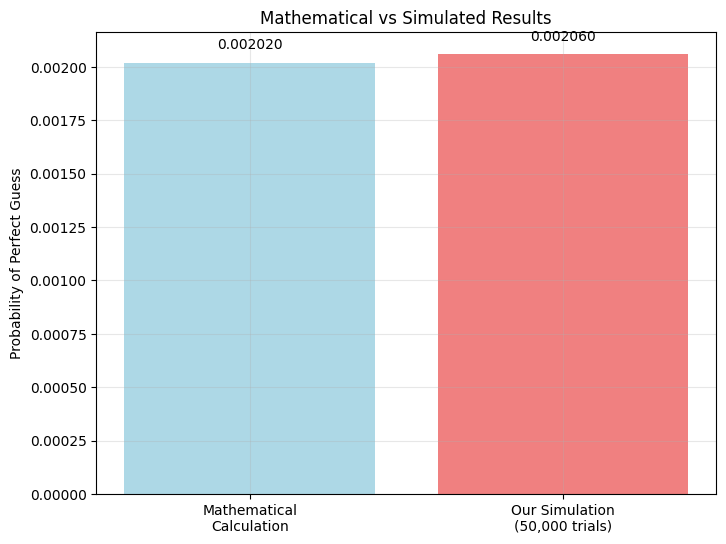

In [50]:
# Visual comparison
labels = ['Mathematical\nCalculation', 'Our Simulation\n(50,000 trials)']
probabilities = [expected_prob, simulated_prob]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, probabilities, color=['lightblue', 'lightcoral'])
plt.ylabel('Probability of Perfect Guess')
plt.title('Mathematical vs Simulated Results')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.00005,
             f'{prob:.6f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()

In [51]:
# Small demonstration
print("Quick demo - first 5 trials:")
true_cups = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
for i in range(5):
    test_cups = true_cups.copy()
    random.shuffle(test_cups)
    print(f"Trial {i+1}: {test_cups} → Perfect? {test_cups == true_cups}")

Quick demo - first 5 trials:
Trial 1: [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1] → Perfect? False
Trial 2: [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1] → Perfect? False
Trial 3: [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0] → Perfect? False
Trial 4: [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] → Perfect? False
Trial 5: [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1] → Perfect? False


Now let's demonstrate the different ways of selecting milk_first_cups out of all_cups cups of tea. For this step we used [itertools.combination](https://docs.python.org/3/library/itertools.html#itertools.combinations) function from Python standard library.

In [41]:
# Different ways of selecting milk_first_cups out of all_cups cups of tea.
comb_cups = list(itertools.combinations(labels, milk_first_cups))

# Show.
comb_cups[:10]  # Show only the first 10 combinations

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4)]

In [42]:
# Number of combinations
len(comb_cups)

495

In [43]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort the selected labels for better readability
labels_milk.sort()

# Show.
labels_milk

[1, 4, 5, 7]

In [44]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{1, 4, 5, 7}

In [45]:
# Calculate the overlaps between each element of comb_cups and labels_milk.

overlaps = []

# Loop through the combinations.
for i in comb_cups:
  # Turn i into a set.
  s1 = set(i)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(i, len(overlap), overlap)
  # Append overlap to overlaps.
  overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {1}
(0, 1, 2, 4) 2 {1, 4}
(0, 1, 2, 5) 2 {1, 5}
(0, 1, 2, 6) 1 {1}
(0, 1, 2, 7) 2 {1, 7}
(0, 1, 2, 8) 1 {1}
(0, 1, 2, 9) 1 {1}
(0, 1, 2, 10) 1 {1}
(0, 1, 2, 11) 1 {1}
(0, 1, 3, 4) 2 {1, 4}
(0, 1, 3, 5) 2 {1, 5}
(0, 1, 3, 6) 1 {1}
(0, 1, 3, 7) 2 {1, 7}
(0, 1, 3, 8) 1 {1}
(0, 1, 3, 9) 1 {1}
(0, 1, 3, 10) 1 {1}
(0, 1, 3, 11) 1 {1}
(0, 1, 4, 5) 3 {1, 4, 5}
(0, 1, 4, 6) 2 {1, 4}
(0, 1, 4, 7) 3 {1, 4, 7}
(0, 1, 4, 8) 2 {1, 4}
(0, 1, 4, 9) 2 {1, 4}
(0, 1, 4, 10) 2 {1, 4}
(0, 1, 4, 11) 2 {1, 4}
(0, 1, 5, 6) 2 {1, 5}
(0, 1, 5, 7) 3 {1, 5, 7}
(0, 1, 5, 8) 2 {1, 5}
(0, 1, 5, 9) 2 {1, 5}
(0, 1, 5, 10) 2 {1, 5}
(0, 1, 5, 11) 2 {1, 5}
(0, 1, 6, 7) 2 {1, 7}
(0, 1, 6, 8) 1 {1}
(0, 1, 6, 9) 1 {1}
(0, 1, 6, 10) 1 {1}
(0, 1, 6, 11) 1 {1}
(0, 1, 7, 8) 2 {1, 7}
(0, 1, 7, 9) 2 {1, 7}
(0, 1, 7, 10) 2 {1, 7}
(0, 1, 7, 11) 2 {1, 7}
(0, 1, 8, 9) 1 {1}
(0, 1, 8, 10) 1 {1}
(0, 1, 8, 11) 1 {1}
(0, 1, 9, 10) 1 {1}
(0, 1, 9, 11) 1 {1}
(0, 1, 10, 11) 1 {1}
(0, 2, 3, 4) 1 {4}
(0, 2, 3, 5) 1 {5}
(0, 2, 3

In [46]:
# Show the overlaps.
print(overlaps)

[1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 

In [47]:
# Count the number of times each overlap occurs.
counts = np.unique(overlaps, return_counts=True)

# Show.
counts


(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

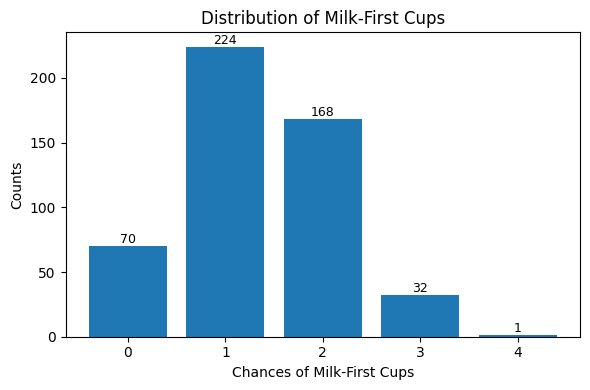

In [48]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.bar(counts[0], counts[1])

# Add labels on top of bars.
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height,                             # y position
        f'{height:.0f}',                    # label text
        ha='center', va='bottom', fontsize=9
    )

ax.set_xlabel("Chances of Milk-First Cups")
ax.set_ylabel("Counts")
ax.set_title("Distribution of Milk-First Cups")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Problem 2: Normal Distribution

## Problem 3: t-Tests

## Problem 4: ANOVA

***
# End